In [14]:
import pandas as pd
import time, requests, re
import matplotlib.pyplot as plt


import numpy as np
import seaborn as sns 
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.style.use('ggplot')
# sns.set_style("whitegrid", {'axes.grid' : True})

%matplotlib inline

# Augusts graphics

In [19]:
merged.tail(10)

,year,area,sektor,jobtype,n_jobtype_area,n_sektor_area,n_sektor,n_area,n_year,20-64years_area,...,FD_sektor,FD_area,FD_year,"BNP, 1000 kr. (2010)",FD_BNP,ratio_jobtype_area,ratio_sektor_area,ratio_sektor,ratio_area,ratio_year
4940,2017,region-sjaelland,social,pleje,2431,6330,45693,25973,266462,462645,...,1349.0,-368.0,-5600.0,1998.975791,44.499042,6.561939,-0.224724,30.315259,-8.269841,-125.845406
4941,2017,region-sjaelland,social,psykologi,197,6330,45693,25973,266462,462645,...,1349.0,-368.0,-5600.0,1998.975791,44.499042,0.471920,-0.224724,30.315259,-8.269841,-125.845406
4942,2017,region-sjaelland,social,socialraadgivning,487,6330,45693,25973,266462,462645,...,1349.0,-368.0,-5600.0,1998.975791,44.499042,1.168564,-0.224724,30.315259,-8.269841,-125.845406
4943,2017,region-sjaelland,social,tandlaege,232,6330,45693,25973,266462,462645,...,1349.0,-368.0,-5600.0,1998.975791,44.499042,0.471920,-0.224724,30.315259,-8.269841,-125.845406
4944,2017,region-sjaelland,social,teknisksundhed,77,6330,45693,25973,266462,462645,...,1349.0,-368.0,-5600.0,1998.975791,44.499042,0.269669,-0.224724,30.315259,-8.269841,-125.845406
4945,2017,region-sjaelland,social,terapi,360,6330,45693,25973,266462,462645,...,1349.0,-368.0,-5600.0,1998.975791,44.499042,-0.067417,-0.224724,30.315259,-8.269841,-125.845406
4946,2017,region-sjaelland,undervisning,bibliotek,40,4499,43176,25973,266462,462645,...,985.0,-368.0,-5600.0,1998.975791,44.499042,0.382031,5.191123,22.135308,-8.269841,-125.845406
4947,2017,region-sjaelland,undervisning,forskning,594,4499,43176,25973,266462,462645,...,985.0,-368.0,-5600.0,1998.975791,44.499042,2.943884,5.191123,22.135308,-8.269841,-125.845406
4948,2017,region-sjaelland,undervisning,laerer,1475,4499,43176,25973,266462,462645,...,985.0,-368.0,-5600.0,1998.975791,44.499042,-3.505693,5.191123,22.135308,-8.269841,-125.845406
4949,2017,region-sjaelland,undervisning,paedagog,2197,4499,43176,25973,266462,462645,...,985.0,-368.0,-5600.0,1998.975791,44.499042,5.303485,5.191123,22.135308,-8.269841,-125.845406


In [51]:
raw='https://raw.githubusercontent.com/Naeim-S/GRP33/master/EXAM/merged_ratio.csv'
merged=pd.read_csv(raw)
del merged['Unnamed: 0']

sektor_order=merged.sektor.unique()
area_order=merged.area.unique()

In [52]:
merged.tail(10)

,year,area,sektor,jobtype,n_jobtype_area,n_sektor_area,n_sektor,n_area,n_year,20-64years_area,...,AR_jobtype_area,AR_sektor_area,AR_sektor,AR_area,AR_year,RR_jobtype_area,RR_sektor_area,RR_sektor,RR_area,RR_year
4940,2017,region-sjaelland,social,pleje,2431,6330,45693,25973,266462,462645,...,6.561939,-0.224724,30.315259,-8.269841,-125.845406,5.995866,-0.069277,1.336155,-0.613614,-0.904066
4941,2017,region-sjaelland,social,psykologi,197,6330,45693,25973,266462,462645,...,0.471920,-0.224724,30.315259,-8.269841,-125.845406,5.240666,-0.069277,1.336155,-0.613614,-0.904066
4942,2017,region-sjaelland,social,socialraadgivning,487,6330,45693,25973,266462,462645,...,1.168564,-0.224724,30.315259,-8.269841,-125.845406,5.250419,-0.069277,1.336155,-0.613614,-0.904066
4943,2017,region-sjaelland,social,tandlaege,232,6330,45693,25973,266462,462645,...,0.471920,-0.224724,30.315259,-8.269841,-125.845406,4.371361,-0.069277,1.336155,-0.613614,-0.904066
4944,2017,region-sjaelland,social,teknisksundhed,77,6330,45693,25973,266462,462645,...,0.269669,-0.224724,30.315259,-8.269841,-125.845406,8.108635,-0.069277,1.336155,-0.613614,-0.904066
4945,2017,region-sjaelland,social,terapi,360,6330,45693,25973,266462,462645,...,-0.067417,-0.224724,30.315259,-8.269841,-125.845406,-0.362990,-0.069277,1.336155,-0.613614,-0.904066
4946,2017,region-sjaelland,undervisning,bibliotek,40,4499,43176,25973,266462,462645,...,0.382031,5.191123,22.135308,-8.269841,-125.845406,32.463918,2.377209,1.025407,-0.613614,-0.904066
4947,2017,region-sjaelland,undervisning,forskning,594,4499,43176,25973,266462,462645,...,2.943884,5.191123,22.135308,-8.269841,-125.845406,12.427110,2.377209,1.025407,-0.613614,-0.904066
4948,2017,region-sjaelland,undervisning,laerer,1475,4499,43176,25973,266462,462645,...,-3.505693,5.191123,22.135308,-8.269841,-125.845406,-4.200979,2.377209,1.025407,-0.613614,-0.904066
4949,2017,region-sjaelland,undervisning,paedagog,2197,4499,43176,25973,266462,462645,...,5.303485,5.191123,22.135308,-8.269841,-125.845406,5.285843,2.377209,1.025407,-0.613614,-0.904066


In [82]:
#list(merged)

# Analysis 
Having constructed variables in accord with our calculations of relative first differences, we will now plot the ratio between variables and over-all BNP development in Denmark across the yearspan of 2007 to 2017, with both years included. When describing our plots, we keep in mind that the relationship portrayed does not explain causality or statistical correlation. Rather, it must be understood as an indicator of the change in percentage of jobmarket offerings relative to a 1-percent change in the national gross product.

In line with our previous chapter of descriptive statistics the plots presented cover three general levels: The overall development for all areas and sectors, development in sectors on the level of different areas, and select jobtypes on the level of select sectors within areas.

Before moving onto explanations of our plotted graphs, we wish to shortly touch upon a a major fluctutation with the plotting of data from the year of 2012. As should be evident from the following graphs presented, there is a major fluctation in allmost all variables relative to the movement in the BNP for the year 2012. Looking into the development of both jobpostings and BNP from 2011 to 2012, we find that whilst there is only a slight change in BNP close to 0-percent, any increase or decrease in the amount of jobpostings is proven statistically decisive. The disproportional relationship between the two variables should thus be kept in mind when examining the large relative fluctutation, and as thus we will keep in mind that BNP holds little explanatory value in this case.


## Overall development    

_Figure SECTOR_ plots development in relative first difference ratio to BNP in sectors. We find that almost all sectors follow a rather similar pattern of development in accord with BNP. Before 2010 all sectors show a positive relationship with development in the BNP, ranging from around 60- to 10-percentage change in the sector, by 1 percent change in the BNP. This changes between 2010 and 2011, with sectors social and education, peaking with slight negative relationships, and the remaining sectors having positive relationships between 0- and 30-percentage relative change for trade and IT respectively. In 2012 we see a major fluctation with all sectors but leadership showing positive relationships ranging from trade and office at around 30-percentage relative change, to the educational- and social sector peaking at 125- and 175-percentage respectively. In 2013 this fluctation decreases with sectors evenly distributing themselves between slight negative and positive relationships to BNP development. From 2013 through to 2017 all sectors follow somewhat similar patterns, however with IT peaking at a 50-percentage relative change in positive relationship in 2015 and a change to a negative relationship in 2016. By 2017 all sectors seem to be closely distributed around 0-percentage relative change. 

_Figure AREA_ plots development in relative first difference ratio to BNP in area. Years 2008 and 2009 show a positive relationship for all areas, however with a decrease in jobmarket postings relative to BNP. In 2010 most areas hold a positive relationship with only a minor relative change, expect for Region Zealand showing a negative relationship with development in BNP, at 10-percentage relative change. In 2012 an upward fluctation occurs with all areas showing positive relationships, ranging from Region Southern Denmark at around 10-percentage relative change, to Region Northern Jutland at a 70-percentage relative change ratio to BNP. From 2013 through to 2016 the areas follow similar patterns of relationship to BNP, moving between 0- to 15- percentage relative change, before stabilizing around 0-percent relative change in 2017. 


## Development on the level of sectors within areas  

_Figure B_ plots the development in relative first difference ratio to BNP for all regions. An overall trend seem to be present for all sectors across all regions: Sectors experience a major drop in relative change from 2008 to 2009 before clustering at a positive relationship to development in BNP through to 2011. By 2012 major fluctuations occur with regions Capital Area and Central Jutland seeing an even split between sectors in positive and negative relationships. For the remaining three regions the fluctuation is predominantly in the direction of positive relationship, however with the IT-sector showing a negative relationship at 25- and 40-percentage relative change for regions Central Jutland and Southern Denmark respectively. For region Zealand only the trade-sector poses a negative relationship at 5-percentage relative change. By 2013 and through to 2017 sectors across all regions seem to once again cluster at a generally positive relationship with the development in BNP at a level of around 0- to 25-percentage relative change.  
For specific sectors some general trends are worth noting: The social- and educational sector generally show a negative relationship by years 2010 and 2011, and one or both regions will be amongst the peaks in positively related relative change by 2012. The IT-sector generally shows positively related peaks in the years 2010 or 2011, and 2014 or 2015, with region Zealand being the region in which this trend is least visible. Both of these regionwide sector-developments seem to match the overall development of sectors as previously presented, with no region visibly over- or underperforming in terms of degree of relative change. Furthermore, on the region-wide level the trade-sector appears as the sector with the least fluctuation. The sector peaks at a positive relationship to development in BNP of 30-percentage relative change by 2012 in Northern Jutland, whilst generally showing a trend that fluctuates between slight negative and positive relationships in the range of minus 5- to plus 20-percentage relative change.
When examining overall development in areas across time we previously found that Zealand showed the largest trend from the general trend by posing a sole negative relationship in 2010. Looking into sectors on the region-specific level we find that this may largely be due to most sectors placing themselves just around the 0-percentage mark of relative change, with several sectors dipping into a negative relationship. The highest value of relative change is found in the trade sector at 10-percentage, thus showing that the region of Zealand had little perforance for the year 2010 as related to other regions.

 **-Følgende afsnit udelades:** 
 ___
Starting with _Figure CA_ we see the plotting for the region Capital Area. With all sectors within the area showing a positive relationship with the development in BNP from 2007 to 2009, the sectors split by 2010. This leaves the social- and educational sector at a negative relationship in the 10-percentage relative change rate. The remainder of the sectors pose a positive relationship with levels of relative change ranging from 0-percentage for trade, to 25-percentage for IT. The negative relations disappear by 2011, and in the 2012 we see a large fluctuation of sector in both negative and positive direction. In this we find the management sector at a negative relation of 25-percentage relative change, whilst on the other hand the social sector poses the highest relative change of the area, with 150-percentage positive relationship. By 2014 we find that the sectors cluster around a positive relationship to BNP at between 5-percentage relative change for trade and 25-percentage relative change for the IT-sector. By 2016 and through to 2017 all sectors follow a similar trend, distributing around 0-percentage relative change, and slight positive or negative relationships.  

_Figure CJ_ shows the plotting of relative first differences ratio to BNP for the region of Central Jutland. With all sector but education posing a positive relationship to development in the BNP in 2008, the sectors cluster around a 10-percentage relative change in 2009. By 2010 the sector split, with the educational-, social-, and trade sectors showing a negative relationship, and the remainder of the sectors showing positive relationships in the range of 10- to 50-percentage relative change. This split is furthered with the fluctuation in 2012. Social-, educational, and others sectors show a positive relationship at 100-percentage relative change or upward. Trade- and industrial sectors are found near a 0-percentage relative change mark, and the remaining four sectors show negative relationships. For the years 2013 through to 2017, the sectors cluster at a positive relationship of around 10-percentage relative change.  

_Figure SD_ plots the development for the region of Southern Denmark. General trends for sectors are followed, with most sectors showing similar patterns before and after 2012. Standing out we find that the It-sector shows a positive relationship with the development of BNP for all years expect for 2012. This positive relationship peaks at a 35- and 20-percentage relative change in 2010 and 2015 respectively. Like previous graphs the sectors generally cluster by 2014 at a positive relationship between 5- and 15-percentage relative change and follows this pattern through to 2017.  

_Figure Zealand_ plots the development for the region of Zealand. Contrary to previous figures we find that both social- and IT-sectors pose a negative relationship at around 20-percentage relative change by 2008. A similar pattern to previous figures is however repeated when sectors cluster in 2009 at all positive relationships to the development in BNP. The pattern however changes when most sectors move onto a negative relationship with only a slight relative change in 2011, before the fluctuations of 2012, in which all sectors but management show positive relations, and with the IT-sector peaking at around 120-percentage relative change. By 2014 through to 2017 sectors follow a similar trend of positive relations in the 5- to 20-percentage range of relative change, and some sectors showing negative relations by 2015 and 2016.  

_Figure NJ_ plots the development of the region of Northern Jutland. All sectors but the educational and social generally show positive relationships to the development of BNP until 2011, 2012 when fluctuations occur. Thus, we find the IT-sector to be the only sector with a negative relationship, with the remaining sectors grouping at positive relationships in the range of 25- to around 50- percentage, and 100- to 145-percentage relative change. By 2014 sectors cluster at positive relationships with relative change in the range of 0- to 25-percentage.
___



## Development on the level of jobtypes in sectors within areas  
On the level of jobtypes of select sectors within select areas we return to the four examples presented in the previous chapter of descriptive statistics. _Figure X_ plots development in relative first differences ratio to BNP for jobtypes in sectors IT and office work for the region Capital Area, and trade and industry for Zealand. Worth noting is that the jobtype of IT-courses in the Capital Area has been left out, as the jobtype saw a rise from 1 to 175 going from 2013 to 2014. This prompted a degree of relative change at 17500-percentage thus making the figure highly uninterpretable. Similar action has been taken towards the jobtype of office-courses for sector office work, as the level of relative change hit 300-percentage, and as thus was deemed a disturbing outlier.

Starting with the region of Capital Area, we find that jobtypes in the sector IT presents some diversity, with jobtypes telecommunication and system development starting at a positive relationship, and remaining jobtypes at a negative. With fluctuations splitting the relationship of jobtypes between both positive and negative, this even out by 2013 through to 2017, with some jobtypes briefly finding themselves at a negative relationship.
For jobtypes in the sector of office work, all positions start at a positive relationship ranging from 20- to 60-percentage relative change. This seems to hold true through to 2012, with some jobtypes showing a negative relationship. By 2013 through to 2017 jobtypes cluster at a level of relative change between 0- and 30-percentage, showing generally positive relationships with development in BNP. Translation stands out for the period until 2016 when it returns to the level of the remaining jobtypes.

For jobtypes in both the industry- and the trade sector in region Zealand similar patterns occur. All jobtypes pose a positive relationship to development in BNP by 2007, dropping in level of relative change though to 2008. By 2009 a split occurs, with jobtypes finding themselves close to the level of 0-percentage relative change and the sectors finding jobs that pose both positive- and negative relationships. For the trade sector delivery stands out, with a positively related level of relative change above 100-percentage. With fluctuations in 2012 the trade sector finds a majority of jobs posing negative relationships with high levels of relative change, whilst the industry sector shows a somewhat even distribution of jobtypes with positive- and negative relationships. For industry jobtypes electrician and paint show relative change in positive relation to BNP at 200- and 300-percentage respectively. By 2013 through to 2017 jobtypes in both sectors cluster at generally relationships, with some jobtypes briefly showing a negative relationship by 2016.  The level of relative change is generally in the range of minus 5- to plus 50-percentage, however with childcare in the trade sector showing a level of 100-percentage relative change in 2013.




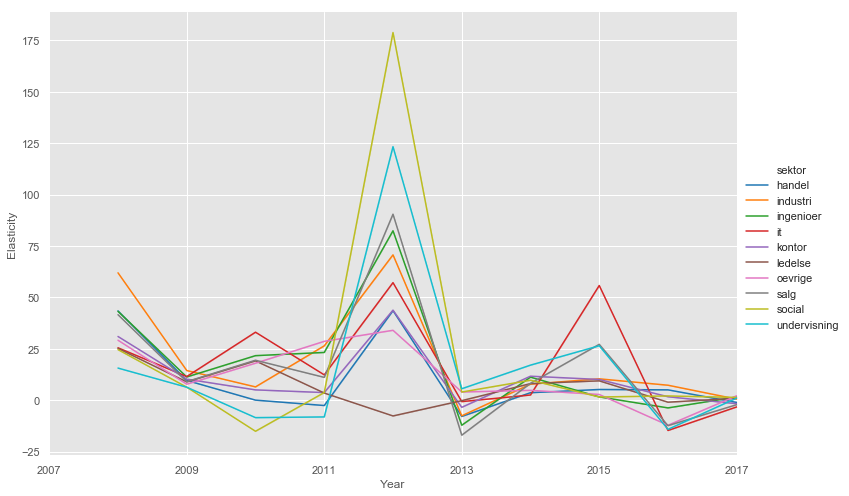

In [95]:
#Exclude "danmark" and sort by n_area and year (for nicer plot):
#merged_sektor = merged.query('sektor').sort_values(by=["ratio_sektor","year"], ascending=False)

sns.set_palette("tab10")
sns.relplot(x="year", y="RR_sektor", 
            hue="sektor", 
            kind="line", 
            height=7, 
            aspect=1.5, 
            legend = "brief",
            hue_order=sektor_order,
            data=merged)
plt.ylabel("Elasticity")
#plt.yticks(range(0,100,10))
plt.xlim(2007,2017)
plt.xticks(range(2007,2018,2))
plt.xlabel("Year")

plt.savefig('1_RR_Sector.png',bbox_inches='tight')
# All jobs for each area over time

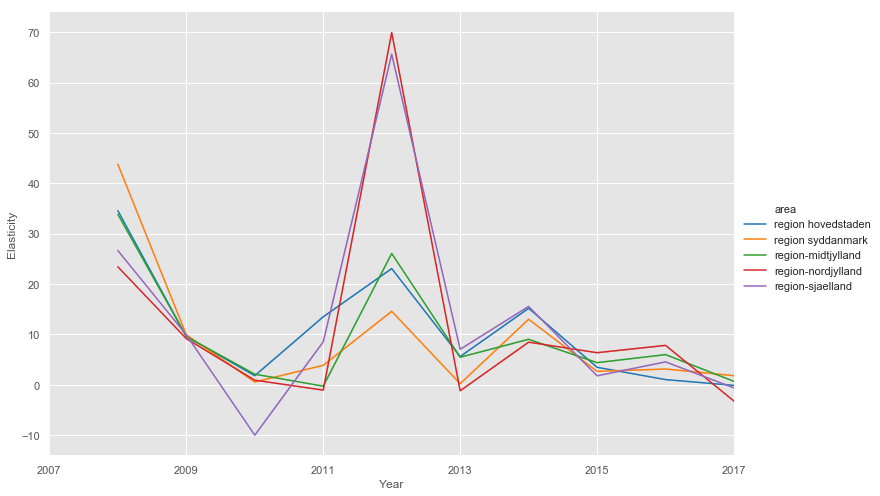

In [94]:
#Exclude "danmark" and sort by n_area and year (for nicer plot):
#merged_area = merged.query(' area != "danmark"').sort_values(by=["ratio_area","year"], ascending=False)

sns.set_palette("tab10")
sns.relplot(x="year", y="RR_area", 
            hue="area", 
            kind="line", 
            height=7, 
            aspect=1.5, 
            legend = "brief",
            hue_order=area_order,
            data=merged)
plt.ylabel("Elasticity")
#plt.yticks(range(0,100,10))
plt.xlim(2007,2017)
plt.xticks(range(2007,2018,2))
plt.xlabel("Year")

plt.savefig('2_RR_Area.png',bbox_inches='tight')


# All jobs for each area over time

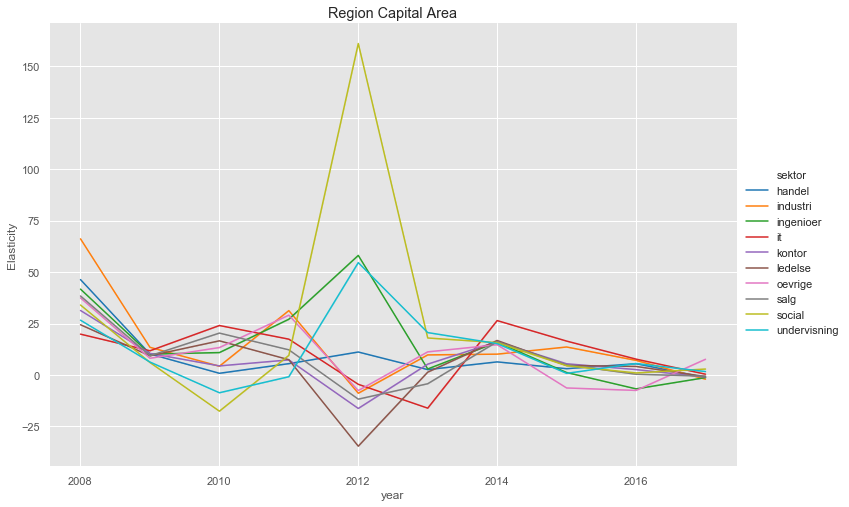

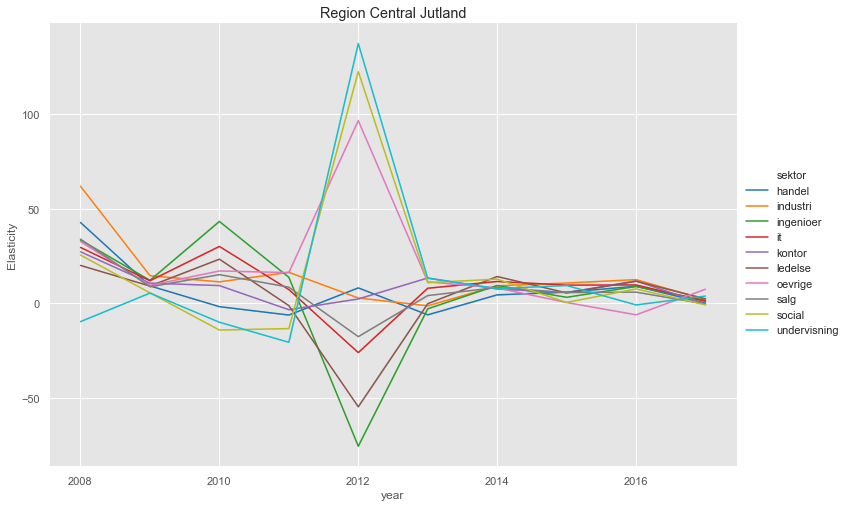

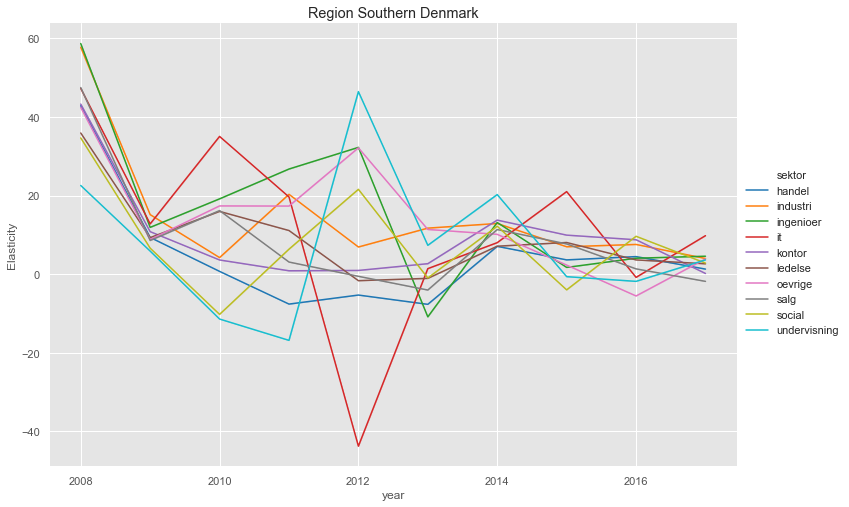

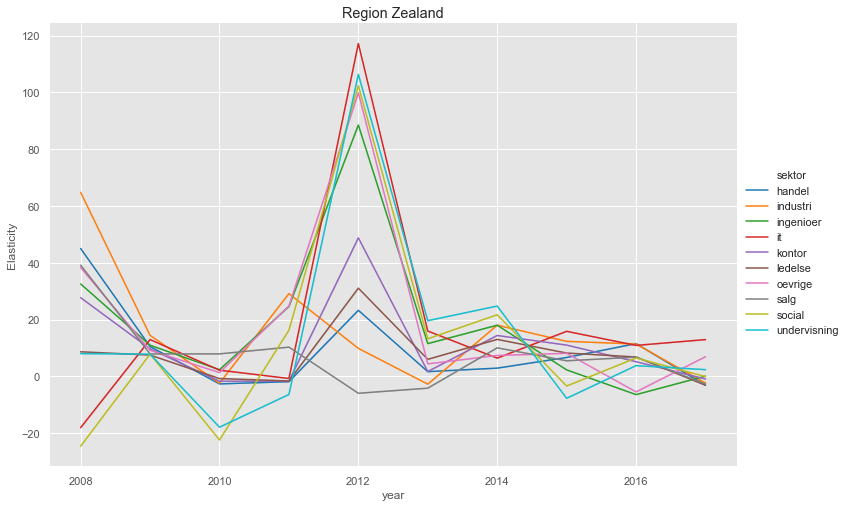

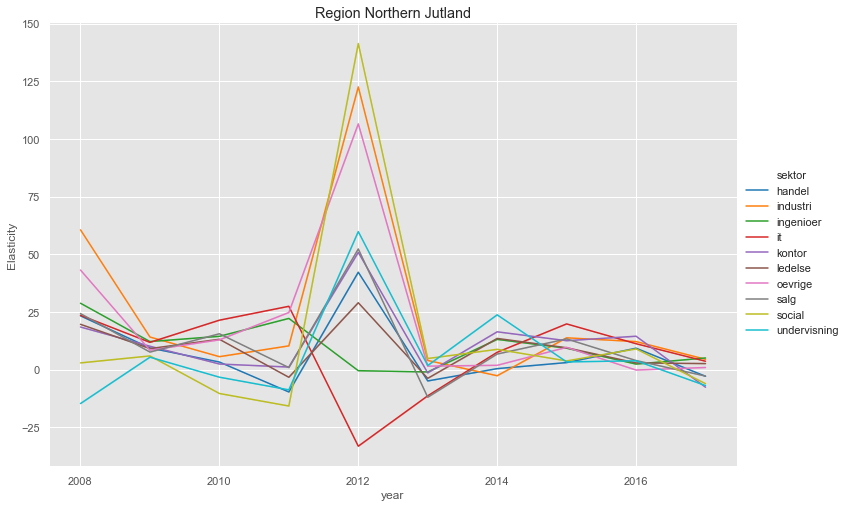

In [92]:
#All sectors for each area over time - FD to BNP ratio

sns.set_palette("tab10")

#KØBENHAVN
sns.relplot(x="year", y="RR_sektor_area", 
        hue="sektor", 
        kind="line", 
        legend = "brief",        
        height=7, 
        aspect=1.5, 
        hue_order=sektor_order,
        data=merged.query('area == "region hovedstaden"').sort_values(by=["year", "ratio_sektor_area"], ascending=False))
plt.title("Region Capital Area")
plt.ylabel("Elasticity")

plt.savefig('3.1_RR_sector_area.png',bbox_inches='tight')

#MIDTJYLLAND
sns.relplot(x="year", y="RR_sektor_area", 
        hue="sektor", 
        kind="line", 
        height=7, 
        aspect=1.5, 
        legend = "brief",
        hue_order=sektor_order,
        data=merged.query('area == "region-midtjylland" ').sort_values(by=["year", "ratio_sektor_area"], ascending=False))
plt.title("Region Central Jutland")
plt.ylabel("Elasticity")

plt.savefig('3.2_RR_sector_area.png',bbox_inches='tight')

#SYDJYLLAND
sns.relplot(x="year", y="RR_sektor_area", 
        hue="sektor", 
        kind="line",
        height=7, 
        aspect=1.5, 
        legend = "brief",
        hue_order=sektor_order,
        data=merged.query('area == "region syddanmark" ').sort_values(by=["year", "ratio_sektor_area"], ascending=False))
plt.title("Region Southern Denmark")
plt.ylabel("Elasticity")

plt.savefig('3.3_RR_sector_area.png',bbox_inches='tight')

#REGION SJÆLLAND
sns.relplot(x="year", y="RR_sektor_area", 
        hue="sektor", 
        kind="line", 
        height=7, 
        aspect=1.5, 
        legend = "brief",
        hue_order=sektor_order,
        data=merged.query('area == "region-sjaelland" ').sort_values(by=["year", "ratio_sektor_area"], ascending=False))
plt.title("Region Zealand")
plt.ylabel("Elasticity")

plt.savefig('3.4_RR_sector_area.png',bbox_inches='tight')


#NORDJYLLAND
sns.relplot(x="year", y="RR_sektor_area", 
        hue="sektor", 
        kind="line", 
        height=7, 
        aspect=1.5, 
        legend = "brief",
        hue_order=sektor_order,
        data=merged.query('area == "region-nordjylland" ').sort_values(by=["year", "ratio_sektor_area"], ascending=False))
plt.title("Region Northern Jutland")
plt.ylabel("Elasticity")

plt.savefig('3.5_RR_sector_area.png',bbox_inches='tight')


In [60]:
merged.tail(10)

,year,area,sektor,jobtype,n_jobtype_area,n_sektor_area,n_sektor,n_area,n_year,20-64years_area,...,AR_jobtype_area,AR_sektor_area,AR_sektor,AR_area,AR_year,RR_jobtype_area,RR_sektor_area,RR_sektor,RR_area,RR_year
4940,2017,region-sjaelland,social,pleje,2431,6330,45693,25973,266462,462645,...,6.561939,-0.224724,30.315259,-8.269841,-125.845406,5.995866,-0.069277,1.336155,-0.613614,-0.904066
4941,2017,region-sjaelland,social,psykologi,197,6330,45693,25973,266462,462645,...,0.471920,-0.224724,30.315259,-8.269841,-125.845406,5.240666,-0.069277,1.336155,-0.613614,-0.904066
4942,2017,region-sjaelland,social,socialraadgivning,487,6330,45693,25973,266462,462645,...,1.168564,-0.224724,30.315259,-8.269841,-125.845406,5.250419,-0.069277,1.336155,-0.613614,-0.904066
4943,2017,region-sjaelland,social,tandlaege,232,6330,45693,25973,266462,462645,...,0.471920,-0.224724,30.315259,-8.269841,-125.845406,4.371361,-0.069277,1.336155,-0.613614,-0.904066
4944,2017,region-sjaelland,social,teknisksundhed,77,6330,45693,25973,266462,462645,...,0.269669,-0.224724,30.315259,-8.269841,-125.845406,8.108635,-0.069277,1.336155,-0.613614,-0.904066
4945,2017,region-sjaelland,social,terapi,360,6330,45693,25973,266462,462645,...,-0.067417,-0.224724,30.315259,-8.269841,-125.845406,-0.362990,-0.069277,1.336155,-0.613614,-0.904066
4946,2017,region-sjaelland,undervisning,bibliotek,40,4499,43176,25973,266462,462645,...,0.382031,5.191123,22.135308,-8.269841,-125.845406,32.463918,2.377209,1.025407,-0.613614,-0.904066
4947,2017,region-sjaelland,undervisning,forskning,594,4499,43176,25973,266462,462645,...,2.943884,5.191123,22.135308,-8.269841,-125.845406,12.427110,2.377209,1.025407,-0.613614,-0.904066
4948,2017,region-sjaelland,undervisning,laerer,1475,4499,43176,25973,266462,462645,...,-3.505693,5.191123,22.135308,-8.269841,-125.845406,-4.200979,2.377209,1.025407,-0.613614,-0.904066
4949,2017,region-sjaelland,undervisning,paedagog,2197,4499,43176,25973,266462,462645,...,5.303485,5.191123,22.135308,-8.269841,-125.845406,5.285843,2.377209,1.025407,-0.613614,-0.904066


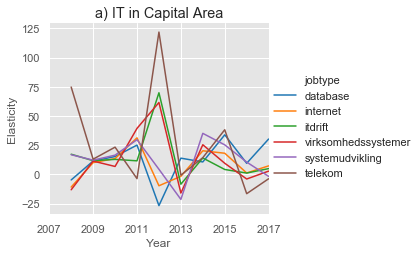

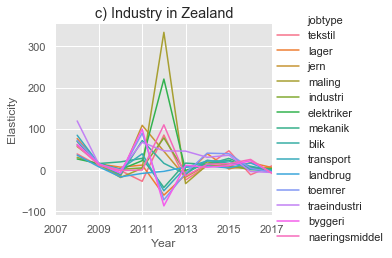

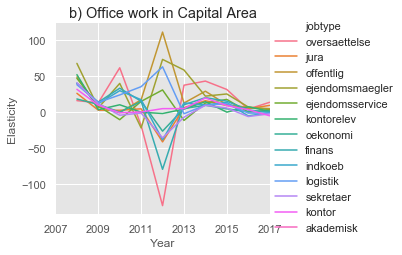

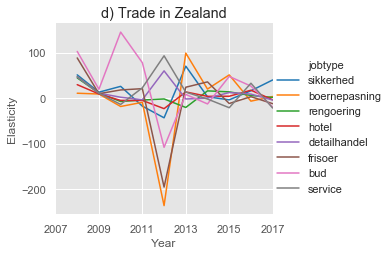

In [93]:
#KØBENHAVN IT 
sns.relplot(x="year", y="RR_jobtype_area", 
        hue="jobtype", 
        kind="line", 
        legend = "brief",        
        height=3.5, 
        aspect=1.2, 
      #  ax=ax1,
      #  hue_order=sektor_order,
        data=merged.query('area == "region hovedstaden" & sektor == "it" & jobtype != "itkurser"').sort_values(by=["year", "RR_jobtype_area"], ascending=False))
plt.title("a) IT in Capital Area")
plt.ylabel("Elasticity")
#plt.ylim(0,0.04)
plt.xlim(2007,2017)
plt.xticks(range(2007,2018,2))
plt.xlabel("Year")

plt.savefig('4.1_RR_jobtype_area.png',bbox_inches='tight')


#Sjælland industri 
sns.relplot(x="year", y="RR_jobtype_area", 
        hue="jobtype", 
        kind="line", 
        legend = "brief",        
        height=3.5, 
        aspect=1.2, 
      #  ax=ax1,
      #  hue_order=sektor_order,
        data=merged.query('area == "region-sjaelland" & sektor == "industri"').sort_values(by=["year", "RR_jobtype_area"], ascending=False))
plt.title("c) Industry in Zealand")
plt.ylabel("Elasticity")
#plt.ylim(0,0.04)
plt.xlim(2007,2017)
plt.xticks(range(2007,2018,2))
plt.xlabel("Year")

plt.savefig('4.2_RR_jobtype_area.png',bbox_inches='tight')

#KØBENHAVN kontor
sns.relplot(x="year", y="RR_jobtype_area", 
        hue="jobtype", 
        kind="line", 
        legend = "brief",        
        height=3.5, 
        aspect=1.2, 
      #  ax=ax1,
      #  hue_order=sektor_order,
        data=merged.query('area == "region hovedstaden" & sektor == "kontor" & jobtype != "kontorkurser"').sort_values(by=["year", "RR_jobtype_area"], ascending=False))
plt.title("b) Office work in Capital Area")
plt.ylabel("Elasticity")
#plt.ylim(0,0.04)
plt.xlim(2007,2017)
plt.xticks(range(2007,2018,2))
plt.xlabel("Year")

plt.savefig('4.3_RR_jobtype_area.png',bbox_inches='tight')


#Sjælland handel
sns.relplot(x="year", y="RR_jobtype_area", 
        hue="jobtype", 
        kind="line", 
        legend = "brief",        
        height=3.5, 
        aspect=1.2, 
      #  ax=ax1,
      #  hue_order=sektor_order,
        data=merged.query('area == "region-sjaelland" & sektor == "handel"').sort_values(by=["year", "RR_jobtype_area"], ascending=False))
plt.title("d) Trade in Zealand")
plt.ylabel("Elasticity")
#plt.ylim(0,0.04)
plt.xlim(2007,2017)
plt.xticks(range(2007,2018,2))
plt.xlabel("Year")

plt.savefig('4.4_RR_jobtype_area.png',bbox_inches='tight')
